In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import numpy as np

In [6]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [8]:
batch_size, height, width, channels

(2, 427, 640, 3)

In [9]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vetical line
filters[3, :, :, 1] = 1 # horizontal line

In [11]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

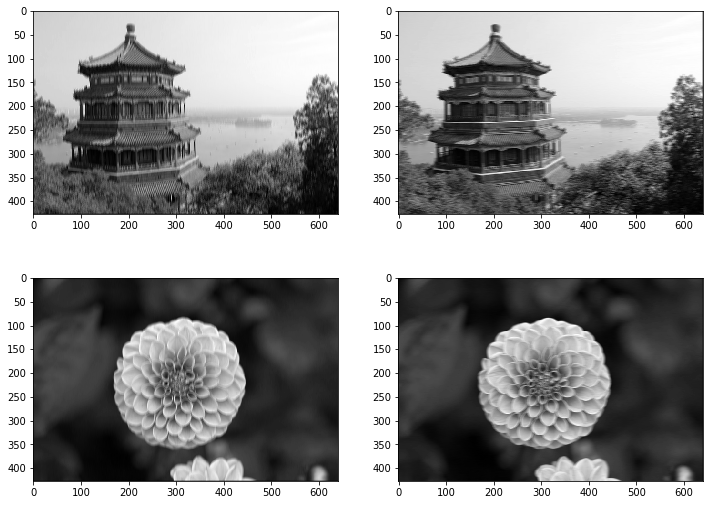

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
ax[0][0].imshow(outputs[0, :, :, 0], cmap="gray") # first image vertical filter
ax[0][1].imshow(outputs[0, :, :, 1], cmap="gray") # first image horizontal filter
ax[1][0].imshow(outputs[1, :, :, 0], cmap="gray") # second image vertical filter
ax[1][1].imshow(outputs[1, :, :, 1], cmap="gray") # second image horizontal filter
plt.show()

In [17]:
# example of convolutional layer
conf = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, 
                           padding="SAME", activation="relu")

In [18]:
from sklearn.datasets import fetch_openml

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [32]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="SAME", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [33]:
model.fit(X_train, y_train, epochs=30, 
          validation_data=(X_valid, y_valid),
          callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 469s 9ms/sample - loss: 0.7169 - accuracy: 0.7465 - val_loss: 0.3998 - val_accuracy: 0.8546
Epoch 2/30
55000/55000 [==============================] - 467s 8ms/sample - loss: 0.4243 - accuracy: 0.8568 - val_loss: 0.3317 - val_accuracy: 0.8762
Epoch 3/30
55000/55000 [==============================] - 469s 9ms/sample - loss: 0.3662 - accuracy: 0.8770 - val_loss: 0.3085 - val_accuracy: 0.8842
Epoch 4/30
55000/55000 [==============================] - 469s 9ms/sample - loss: 0.3353 - accuracy: 0.8865 - val_loss: 0.3192 - val_accuracy: 0.8808
Epoch 5/30
55000/55000 [==============================] - 467s 8ms/sample - loss: 0.3119 - accuracy: 0.8928 - val_loss: 0.2904 - val_accuracy: 0.8972
Epoch 6/30
55000/55000 [==============================] - 462s 8ms/sample - loss: 0.2980 - accuracy: 0.8991 - val_loss: 0.3027 - val_accuracy: 0.8964
Epoch 7/30
55000/55000 [===========================

In [34]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 26s 3ms/sample - loss: 0.2987 - accuracy: 0.8956


[0.2987170439124107, 0.8956]

In [35]:
model.save("models/cnn-mnist_(0.895_accuracy).h5")